In [10]:
pip install numpy scipy matplotlib


Task 1: Given initial conditions $ r(0) = 5$ and $ x(0) = 2, $ solve for r(t) and x(t) and plot
the solution for 0 ≤ t ≤ 70.

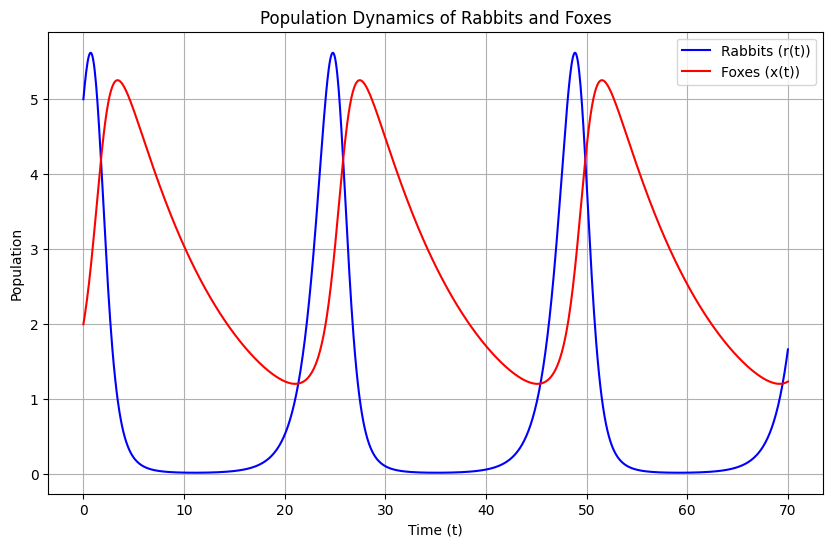

In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE system
def system(y, t, alpha, beta, delta, gamma):
    r, x = y
    drdt = alpha * r - beta * r * x
    dxdt = delta * r * x - gamma * x
    return [drdt, dxdt]

# Initial conditions and time span
r0 = 5.0
x0 = 2.0
initial_conditions = [r0, x0]
t = np.linspace(0, 70, 1000)  # Time points for the solution

# Parameters
alpha = 1.1
beta = 0.4
delta = 0.1
gamma = 0.1

# Solve the ODE system
solution = odeint(system, initial_conditions, t, args=(alpha, beta, delta, gamma))

# Extract the solution for r(t) and x(t)
r_values = solution[:, 0]
x_values = solution[:, 1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, r_values, label='Rabbits (r(t))', color='b')
plt.plot(t, x_values, label='Foxes (x(t))', color='r')
plt.xlabel('Time (t)')
plt.ylabel('Population')
plt.legend()
plt.title('Population Dynamics of Rabbits and Foxes')
plt.grid(True)
plt.show()


Task 2: The phase plot of the solution consists of points (x(t), r(t)) for various t values.
Prepare a fgure (phase portrait) with phase plots of, say, 10 solutions, one each for randomly
chosen initial values r(0) and x(0) between 1 and 9.

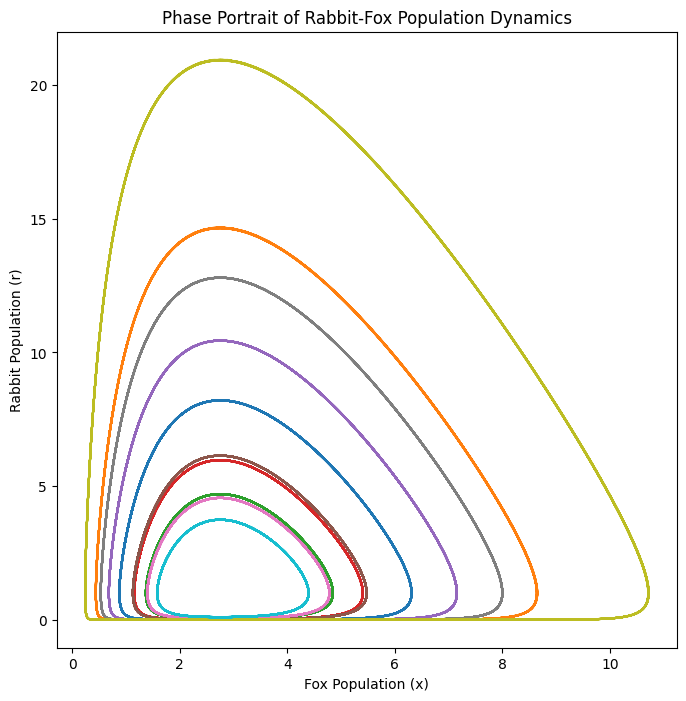

In [12]:
#Parameters
alpha = 1.1
beta = 0.4
delta = 0.1
gamma = 0.1

#Differential equations
def rabbit_fox_system(y, t):
    r, x = y
    drdt = alpha * r - beta * r * x
    dxdt = delta * r * x - gamma * x
    return [drdt, dxdt]

#Time vector
t = np.linspace(0, 500, 10000)

# Initial conditions
initial_conditions = np.random.uniform(1, 9, size=(10, 2))

# Plot the phase portrait
plt.figure(figsize=(8, 8))
for r0, x0 in initial_conditions:
    y0 = [r0, x0]
    sol = odeint(rabbit_fox_system, y0, t)
    plt.plot(sol[:, 1], sol[:, 0], label=f'r(0)={r0}, x(0)={x0}')

plt.xlabel('Fox Population (x)')
plt.ylabel('Rabbit Population (r)')
plt.title('Phase Portrait of Rabbit-Fox Population Dynamics')
plt.show()

Task 3: This system has two equilibria. Solve for them and mark them in your phase
portrait.

Equilibrium 1: r = 0, x = 0
Equilibrium 2: r = 2.75, x = 1.0


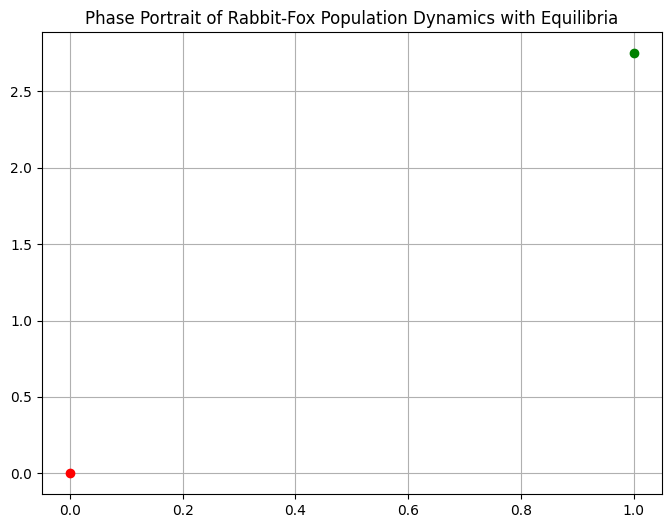

In [13]:
# Calculate and print the equilibrium points
equilibrium1 = [0, 0]
equilibrium2 = [alpha / beta, delta / gamma]
print(f"Equilibrium 1: r = {equilibrium1[0]}, x = {equilibrium1[1]}")
print(f"Equilibrium 2: r = {equilibrium2[0]}, x = {equilibrium2[1]}")

# Plot the phase portrait with equilibria
plt.figure(figsize=(8, 6))
for r0, x0 in initial_conditions:
    y0 = [r0, x0]
    sol = odeint(rabbit_fox_system, y0, t)


plt.plot(equilibrium1[1], equilibrium1[0], 'ro', label='Equilibrium 1 (0, 0)')
plt.plot(equilibrium2[1], equilibrium2[0], 'go', label='Equilibrium 2')
plt.title('Phase Portrait of Rabbit-Fox Population Dynamics with Equilibria')
plt.grid()
plt.show()
